In [454]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import random 
import pyreadr
import warnings
warnings.filterwarnings('ignore')

In [455]:
from pathlib import Path
p = Path().cwd()
print(f"original File path: {p}")
stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")
#ngsimfile=stringpath + '/' + 'Sample_Cleaned_NGSIM_Data_Part_2.csv'
ngsimfile=stringpath + '/' + 'I80_1st15minutes_complete.rds'
#ngsim = pd.read_csv(ngsimfile,low_memory=False, index_col=0)
df = pyreadr.read_r(ngsimfile)

original File path: c:\Users\rakes\car following model\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\rakes\car following model\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [456]:
ngsim=df[None]

In [457]:
ngsim

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,frspacing,entryLane,entry,LCType,dV,svelkm,PrecVehVelkm,svelkm.level,PrecVehVelkm.level,dA
0,1,147,2,50.08315,2.84104,1.46320,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,10.227744,NaN,"(10,15]",NaN,NaN
1,1,148,2,50.38612,3.02972,1.88680,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,10.906992,NaN,"(10,15]",NaN,NaN
2,1,149,2,50.69421,3.08086,0.51134,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,11.091096,NaN,"(10,15]",NaN,NaN
3,1,150,2,51.00658,3.12377,0.42912,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,11.245572,NaN,"(10,15]",NaN,NaN
4,1,151,2,51.32203,3.15445,0.30681,4.3591,2,-1,-1,...,NaN,2,MainLine,CFonly,NaN,11.356020,NaN,"(10,15]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059016,3366,3198,1,440.79796,18.61708,0.18434,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.021488,NaN,"(65,70]",NaN,NaN
1059017,3366,3199,1,442.66070,18.62743,0.10346,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.058748,NaN,"(65,70]",NaN,NaN
1059018,3366,3200,1,444.52374,18.63045,0.03020,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.069620,NaN,"(65,70]",NaN,NaN
1059019,3366,3201,1,446.38651,18.62770,-0.02746,5.1212,2,978,-1,...,NaN,1,MainLine,CFonly,NaN,67.059720,NaN,"(65,70]",NaN,NaN


In [458]:
ngsim.columns

Index(['Vehicle.ID', 'Frame.ID', 'Lane', 'Local.Y', 'svel', 'sacc',
       'Vehicle.Length', 'Vehicle.class', 'Following.Vehicle.ID',
       'Preceding.Vehicle.ID', 'Vehicle.Width.ft', 'PrecVehClass',
       'FollVehClass', 'PrecVehLength', 'FollVehLength', 'lane.change',
       'PrecVehVel', 'PrecVehAcc', 'FollVehVel', 'FollVehAcc', 'Vehicle.type',
       'PrecVehType', 'lanechng', 'PrecVehLocalY', 'FollVehLocalY', 'spacing',
       'headway', 'frspacing', 'entryLane', 'entry', 'LCType', 'dV', 'svelkm',
       'PrecVehVelkm', 'svelkm.level', 'PrecVehVelkm.level', 'dA'],
      dtype='object')

In [459]:
ngsim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059021 entries, 0 to 1059020
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Vehicle.ID            1059021 non-null  int32   
 1   Frame.ID              1059021 non-null  int32   
 2   Lane                  1059021 non-null  int32   
 3   Local.Y               1059021 non-null  float64 
 4   svel                  1059021 non-null  float64 
 5   sacc                  1059021 non-null  float64 
 6   Vehicle.Length        1059021 non-null  float64 
 7   Vehicle.class         1059021 non-null  int32   
 8   Following.Vehicle.ID  1059021 non-null  int32   
 9   Preceding.Vehicle.ID  1059021 non-null  int32   
 10  Vehicle.Width.ft      1059021 non-null  float64 
 11  PrecVehClass          992286 non-null   object  
 12  FollVehClass          992007 non-null   object  
 13  PrecVehLength         992286 non-null   float64 
 14  FollVehLength     

In [460]:
ngsim = ngsim[ngsim["Preceding.Vehicle.ID"] != -1]

In [461]:
ngsim["Vehicle.ID"]=ngsim["Vehicle.ID"].astype(str)
ngsim["Preceding.Vehicle.ID"]=ngsim["Preceding.Vehicle.ID"].astype(str)
ngsim["LF_pairs"] = ngsim["Vehicle.ID"]+ "_"+ngsim["Preceding.Vehicle.ID"]

In [462]:
ngsim["Vehicle.class"]=ngsim["Vehicle.class"].astype(str)
ngsim["PrecVehClass"]=ngsim["PrecVehClass"].astype(str)
ngsim["Veh.cls.pairs"] = ngsim["Vehicle.class"]+ "_"+ngsim["PrecVehClass"]

In [463]:
ngsim["Time.per.frame"] = 0.1

In [464]:
ngsim_grp = ngsim.groupby(["LF_pairs"])

In [465]:
ngsim['Time_duration']= ngsim.groupby(["LF_pairs"], as_index=False).cumcount()*0.1

In [466]:
ngsim["nextframeAcc"]=ngsim.groupby(["LF_pairs"],as_index=False)["sacc"].shift(-1)

In [467]:
ngsim["nextframesvel"]=ngsim.groupby(["LF_pairs"],as_index=False)["svel"].shift(-1)

In [468]:
ngsim["nextframeposition"]=ngsim.groupby(["LF_pairs"],as_index=False)["Local.Y"].shift(-1)

## one hot encoding on pairs

In [469]:
from sklearn.preprocessing import OneHotEncoder

In [470]:
ngsim['Veh.cls.pairs'] = ngsim['Veh.cls.pairs'].astype('category')
ngsim['Veh.cls.pairs.new'] = ngsim['Veh.cls.pairs'].cat.codes
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(ngsim[['Veh.cls.pairs.new']]).toarray())
enc.get_feature_names()
enc_data.columns = enc.get_feature_names()
new_ngsim=ngsim.join(enc_data)

new_ngsim

,Vehicle.ID,Frame.ID,Lane,Local.Y,svel,sacc,Vehicle.Length,Vehicle.class,Following.Vehicle.ID,Preceding.Vehicle.ID,...,nextframesvel,nextframeposition,Veh.cls.pairs.new,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6
334,1,481,2,173.27443,6.94512,-0.96402,4.3591,2,11,3355,...,6.82504,173.95693,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
335,1,482,2,173.95693,6.82504,-1.20074,4.3591,2,11,3355,...,6.68521,174.62545,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
336,1,483,2,174.62545,6.68521,-1.39833,4.3591,2,11,3355,...,6.53877,175.27933,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
337,1,484,2,175.27933,6.53877,-1.46441,4.3591,2,11,3355,...,6.40379,175.91971,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
338,1,485,2,175.91971,6.40379,-1.34976,4.3591,2,11,3355,...,6.29493,176.54920,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058995,3366,3177,1,401.98395,19.22258,-1.47646,5.1212,2,978,977,...,19.04817,403.88877,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058996,3366,3178,1,403.88877,19.04817,-1.74406,5.1212,2,978,977,...,18.85603,405.77437,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058997,3366,3179,1,405.77437,18.85603,-1.92143,5.1212,2,978,977,...,18.66341,407.64071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058998,3366,3180,1,407.64071,18.66341,-1.92618,5.1212,2,978,977,...,18.50354,409.49107,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
#enc=OneHotEncoder()

In [411]:
#enc_data=pd.DataFrame(enc.fit_transform(ngsim[['Veh.cls.pairs.new']]).toarray())

In [412]:
#new_ngsim=ngsim.join(enc_data)

In [415]:
#ngsim['Veh.cls.pairs'].unique()

['2_2', '1_2', '3_2', '2_3', '3_3', '1_1', '1_nan']
Categories (7, object): ['1_1', '1_2', '1_nan', '2_2', '2_3', '3_2', '3_3']

## Random Forest model for reconstructed i-80 data 

In [472]:
new_ngsim.dropna(inplace = True)

In [473]:
new_ngsim.shape

(868409, 52)

In [474]:
new_ngsim.columns

Index(['Vehicle.ID', 'Frame.ID', 'Lane', 'Local.Y', 'svel', 'sacc',
       'Vehicle.Length', 'Vehicle.class', 'Following.Vehicle.ID',
       'Preceding.Vehicle.ID', 'Vehicle.Width.ft', 'PrecVehClass',
       'FollVehClass', 'PrecVehLength', 'FollVehLength', 'lane.change',
       'PrecVehVel', 'PrecVehAcc', 'FollVehVel', 'FollVehAcc', 'Vehicle.type',
       'PrecVehType', 'lanechng', 'PrecVehLocalY', 'FollVehLocalY', 'spacing',
       'headway', 'frspacing', 'entryLane', 'entry', 'LCType', 'dV', 'svelkm',
       'PrecVehVelkm', 'svelkm.level', 'PrecVehVelkm.level', 'dA', 'LF_pairs',
       'Veh.cls.pairs', 'Time.per.frame', 'Time_duration', 'nextframeAcc',
       'nextframesvel', 'nextframeposition', 'Veh.cls.pairs.new', 'x0_0',
       'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6'],
      dtype='object')

In [447]:
X = new_ngsim[['x0_0','x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'Local.Y', 'nextframeAcc', 'Time_duration', 'sacc', 'spacing', 'dV', 'dA']]
Y = new_ngsim['nextframesvel']

In [449]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [450]:
# create model
model = RandomForestRegressor(n_estimators = 20, random_state = 30)
model.fit(X_train, y_train)

c:\Users\rakes\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=20, random_state=30)

In [451]:
def data_in_parts(new_ngsim,rangefrom,rangeto):
    a=new_ngsim['LF_pairs'].unique()
    b = a.tolist()
    b = b[rangefrom:rangeto]
    c= len(a)/30
    return c,b 

In [452]:
def prediction(new_ngsim,b,target_variable,RFReg):
    F_df = []
    r = []
    Q = pd.DataFrame()

    for i in b:

        Q = new_ngsim[new_ngsim['LF_pairs']== i]

        vel=np.zeros(Q.shape[0])
        local_y = np.zeros(Q.shape[0])
        frspacing = np.zeros(Q.shape[0])
        dv = np.zeros(Q.shape[0])
        pred_acc = np.zeros(Q.shape[0])
        dA = np.zeros(Q.shape[0])
    
        #adding first value of the vehicle
        vel[0]=Q.iloc[0]['svel']
        local_y[0] = Q.iloc[0]['Local.Y']
        frspacing[0] = Q.iloc[0]['frspacing']
   #check here
        dv[0] = Q.iloc[0]['dV']
        dA[0] = Q.iloc[0]['dA']    
        #pred_speed[0] = Q.iloc[0]['svel']
        pred_acc[0] = Q.iloc[1][target_variable]
     
    

#     #predicting first value of acceleration
            #check here
        pred_acc[1]= RFReg.predict(np.array([frspacing[0],dv[0],vel[0],dA[0]]).reshape(1,-1))
            

#     #calculating vel,frspacing,local.y,dv from the predicted acceleration.
            #check here
        vel[1] = vel[0]+(pred_acc[1]*0.1)
        dv[1] = vel[1] - Q.iloc[1]['PrecVehVel']

#     ## localy: s = ut + 0.5*a*t^2
        local_y[1] = local_y[0] + ((vel[0]*0.1)+ (0.5*pred_acc[1]*pow(0.1,2)))
        frspacing[1] = Q.iloc[1]['PrecVehLocalY'] - local_y[1] - Q.iloc[1]['PrecVehLength']
        dA[1] = Q.iloc[1]['dA']
    
    
        for j in range(2,len(Q)):
#         ########
#         #print(j)
#         ########
            vel[j] = vel[j-1]+(pred_acc[j]*0.1)
            dv[j] = vel[j] - Q.iloc[j]['PrecVehVel']
#         ########
#         ## localy: s = ut + 0.5*a*t^2
#         ########
            local_y[j] = local_y[j-1] + ((vel[j-1]*0.1)+ (0.5*pred_acc[j]*pow(0.1,2)))
            frspacing[j] = Q.iloc[j]['PrecVehLocalY'] - local_y[j] - Q.iloc[j]['PrecVehLength']
            dA
            if j == len(Q)-1:
                break
            pred_acc[j+1] = RFReg.predict(np.array([frspacing[j],dv[j],vel[j],dA[j]]).reshape(1, -1))
#         ########
#         #print(pred_acc)
#         ########
        Q['pacc']=pred_acc
        Q['pvel']=vel
        Q['pposition']= local_y
        Q['pdv']= dv
        Q['pfrspacing']=frspacing
        F_df.append(Q)
        result = pd.concat(F_df)
        #r.append(r2_score(Q[target_variable], Q['pacc']))
        
 
    return result

# Complete NGSIM data

In [357]:
#ngsim.replace([np.inf, -np.inf], np.nan, inplace=True)

In [358]:
ngsim.dropna(inplace=True)

In [359]:
# converting time from milliseconds to seconds
ngsim["Relative_Time"]= ngsim["Relative_Time"]*0.001
ngsim["Global_Time"]= ngsim["Global_Time"]*0.001

In [360]:
ngsim = ngsim.sort_values(['Relative_Time'], ascending=True)

In [361]:
ngsim["Vehicle_ID"]=ngsim["Vehicle_ID"].astype(str)
ngsim["Preceding"]=ngsim["Preceding"].astype(str)
ngsim["LF_pairs"] = ngsim["Vehicle_ID"]+ "_"+ngsim["Preceding"]

In [362]:
ngsim["v_Class"]=ngsim["v_Class"].astype(str)
ngsim["Preceding_Vehicle_Class"]=ngsim["Preceding_Vehicle_Class"].astype(str)
ngsim["Veh.cls.pairs"] = ngsim["v_Class"]+ "_"+ngsim["Preceding_Vehicle_Class"]

In [363]:
ngsim["Time.per.frame"] = 0.1

In [364]:
ngsim_grp = ngsim.groupby(["LF_pairs"])

In [365]:
#Time duration per pair of each time frame.
ngsim['Time_duration']= ngsim.groupby(["LF_pairs"], as_index=False).cumcount()*0.1

In [366]:
ngsim.tail()

,Vehicle_ID,Preceding,Relative_Time,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Class,...,Location,Preceding_Vehicle_Class,Rear_to_Front_Space_Headway,v_Class_Name,Vehicle_combination,Velocity Difference_Following-Preceding,LF_pairs,Veh.cls.pairs,Time.per.frame,Time_duration
id,,,,,,,,,,,,,,,,,,,,,
1530620,90,85,1.117686e+09,1.118849e+09,41.938,2101.760,6452634.349,1871966.378,3.81,2,...,us-101,Car,10.000488,Car,Car-Car,-3.444240,90_85,2_Car,0.1,144.3
18114,90,85,1.117686e+09,1.118849e+09,42.005,2102.586,6452634.960,1871965.806,3.81,2,...,us-101,Car,10.360152,Car,Car-Car,-3.532632,90_85,2_Car,0.1,144.4
1216839,90,85,1.117686e+09,1.118849e+09,42.072,2103.398,6452635.570,1871965.235,3.81,2,...,us-101,Car,10.725912,Car,Car-Car,-3.456432,90_85,2_Car,0.1,144.5
3942567,90,85,1.117686e+09,1.118849e+09,42.131,2104.237,6452636.161,1871964.689,3.81,2,...,us-101,Car,11.079480,Car,Car-Car,-3.243072,90_85,2_Car,0.1,144.6
1002253,90,85,1.117686e+09,1.118849e+09,42.123,2105.225,6452636.891,1871964.119,3.81,2,...,us-101,Car,11.387328,Car,Car-Car,-2.865120,90_85,2_Car,0.1,144.7


In [367]:
#shift Acceleration column uo bt 1 row for each group of Leading and Following vehicle pair
ngsim["nextframeAcc"]=ngsim.groupby(["LF_pairs"],as_index=False)["v_Acc"].shift(-1)

In [368]:
#shift velocity column uo bt 1 row for each group of Leading and Following vehicle pair
ngsim["nextframesvel"]=ngsim.groupby(["LF_pairs"],as_index=False)["v_Vel"].shift(-1)

In [369]:
#shift longitudinal frame position column uo bt 1 row for each group of Leading and Following vehicle pair
ngsim["nextframeposition"]=ngsim.groupby(["LF_pairs"],as_index=False)["Local_Y"].shift(-1)

In [370]:
ngsim.replace([np.inf, -np.inf], np.nan, inplace=True)
ngsim.dropna(inplace = True)

In [371]:
ngsim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137817 entries, 1582061 to 3942567
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Vehicle_ID                               137817 non-null  object 
 1   Preceding                                137817 non-null  object 
 2   Relative_Time                            137817 non-null  float64
 3   Global_Time                              137817 non-null  float64
 4   Local_X                                  137817 non-null  float64
 5   Local_Y                                  137817 non-null  float64
 6   Global_X                                 137817 non-null  float64
 7   Global_Y                                 137817 non-null  float64
 8   v_length                                 137817 non-null  float64
 9   v_Class                                  137817 non-null  object 
 10  v_Vel                    

In [372]:
ngsim.columns

Index(['Vehicle_ID', 'Preceding', 'Relative_Time', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Class', 'v_Vel',
       'v_Acc', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'v_Class_Name', 'Vehicle_combination',
       'Velocity Difference_Following-Preceding', 'LF_pairs', 'Veh.cls.pairs',
       'Time.per.frame', 'Time_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition'],
      dtype='object')

In [373]:
X = ngsim[["Rear_to_Front_Space_Headway",'Velocity Difference_Following-Preceding','v_Vel', 'v_Acc', 'Time_duration','Local_Y']]

In [374]:
Y = ngsim['nextframeAcc']

In [375]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [376]:
# create model
model = RandomForestRegressor(n_estimators = 20, random_state = 30)

In [377]:
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# use for loop for the predict
prediction_test = model.predict(X_test)
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_test)))


Root Mean Squared Error: 0.7830565286464197


In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

v_Acc                                      0.690408
Velocity Difference_Following-Preceding    0.072771
Local_Y                                    0.065580
v_Vel                                      0.055341
Rear_to_Front_Space_Headway                0.043139
Time_duration                              0.039406
Vehicle_ID                                 0.033356
dtype: float64


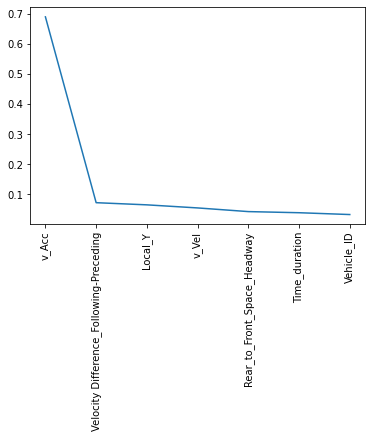

In [ ]:
feature_imp.plot()
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

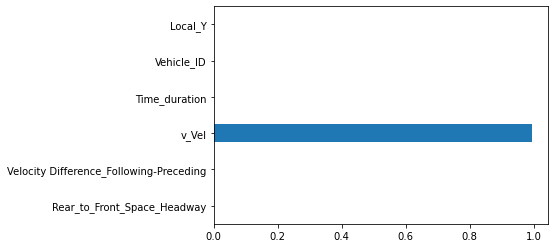

In [ ]:
(pd.Series(model.feature_importances_, index=X.columns)
   .plot(kind='barh'))